In [293]:
import numpy
import sklearn.datasets
import matplotlib.pyplot as pyplot
data, target = sklearn.datasets.load_boston(True)

In [294]:
o = numpy.ones((506,1))
boston = numpy.column_stack((data,o))

A = numpy.column_stack((boston,target))
numpy.random.shuffle(A)
#LS
#w = numpy.matmul(numpy.matmul(numpy.linalg.inv(numpy.matmul(boston.T, boston)), boston.T),target)

# Least Squared Regression

In [295]:
acc = []
ytestlist = [];
ypredlist = [];
for i in range(5):
    if i == 0:
        testing = A[0:101,:]
        training = A[101:506,:]
    if i == 1:
        testing = A[101:202,:]
        training = numpy.concatenate((A[0:101,:],A[202:506,:]), axis=0)
    if i == 2:
        testing = A[202:303,]
        training = numpy.concatenate((A[0:202,:],A[303:506,:]), axis=0)
    if i == 3:
        testing = A[303:404,:]
        training = numpy.concatenate((A[0:303,:],A[404:506,:]), axis=0)
    if i == 4:
        testing = A[404:506,:]
        training = A[0:404,:]

    x = training[:,0:14]
    y = training[:, 14]

    xtest = testing[:,0:14]
    ytest = testing[:, 14]

    w = numpy.matmul(numpy.matmul(numpy.linalg.inv(numpy.matmul(x.T, x)), x.T),y)
    ypred = numpy.matmul(xtest, w)
    ytestlist = numpy.concatenate((ytestlist,ytest),0)
    ypredlist = numpy.concatenate((ypredlist,ypred),0)
    
    sums = 0;
    if i < 4:
        for j in range(101):   
            error = (ypred[j] - ytest[j])**2
            sums = sums + error
        temp = sums/101
    else:
        for j in range(102):   
            error = (ypred[j] - ytest[j])**2
            sums = sums + error
        temp = sums/102
    

    acc.append(temp)


The Mean Error is: 23.55626052227266
Plot of Measured vs Predicted


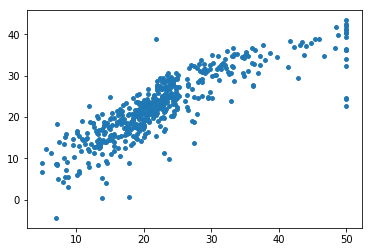

In [299]:
mean = numpy.mean(acc)
print("The Mean Error is:", mean)

pyplot.figure()
pyplot.scatter(ytestlist.tolist(),ypredlist.tolist(),15);
print("Plot of Measured vs Predicted")

# Ridge Regression

In [297]:
lam = []
lame = []
L = numpy.arange(0,1,0.01)
xval = A[404:506,0:14]
yval = A[404:506,14]
A = A[0:404,:]
for l in L:
    acc2 = []
    for i in range(4):
        if i == 0:
            testing = A[0:101,:]
            training = A[101:404,:]
        if i == 1:
            testing = A[101:202,:]
            training = numpy.concatenate((A[0:101,:],A[202:404,:]), axis=0)
        if i == 2:
            testing = A[202:303,]
            training = numpy.concatenate((A[0:202,:],A[303:404,:]), axis=0)
        if i == 3:
            testing = A[303:404,:]
            training = numpy.concatenate((A[0:303,:],A[404:404,:]), axis=0)

        x = training[:,0:14]
        y = training[:, 14]

        xtest = testing[:,0:14]
        ytest = testing[:, 14]
        
        I = numpy.identity(numpy.shape(numpy.matmul(x.T, x))[0])
        
        w = numpy.matmul(numpy.matmul(numpy.linalg.inv(numpy.add(numpy.matmul(x.T, x),l*I)), x.T),y)
               
        ypred = numpy.matmul(xtest, w)
        sums = 0;
        temp = 0;

        for j in range(101):   
            error = (ypred[j] - ytest[j])**2
            sums = sums + error
        
        temp = sums/101    
        acc2.append(temp)
    meantemp = numpy.mean(acc2)
    lame.append(meantemp)
    lam.append(l)

In [298]:
index = numpy.argmin(lame)
print("The best performing lambda value is:",lam[index])
print("This lambda gives a prediction error of:", numpy.min(lame))
#I found that the lambda value varies from around 0.0 to 0.7 depending on the ramdoization of the data.

vpred = numpy.matmul(xval, w);
sums = 0
for i in range(102):   
    error = (vpred[i] - yval[i])**2
    sums = sums + error

verror = sums/101
print("The validation set gives a prediction error of:", verror)

The best performing lambda value is: 0.02
This lambda gives a prediction error of: 22.126160233003798
The validation set gives a prediction error of: 32.64831108807122
